Python notebook for rendering panels from Figure 6 of Matikainen-Ankney et al 2021


In [6]:
##Import libraries
!pip install seaborn==0.9.0 &> /dev/null
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
##Import binned data
df_binned = pd.DataFrame()
url = "https://raw.githubusercontent.com/KravitzLabDevices/FED3/main/Matikainen_Ankney_et_al_2021/data/Fig_5_and_6/df_binned.csv"
df_binned = pd.read_csv(url, parse_dates = True)
df_binned.head()

,Unnamed: 0,Left_Poke_Count,Right_Poke_Count,Pellet_Count,Retrieval_Time,filename,group,sex,MM:DD:YYYY hh:mm:ss,RelativeTime,Errors,Mouse,MotorTurns,RelativeTime2,Retrieval_Time_filt,count,Retrieval_Time_filt_count,Retrieval_Time_filt_sum,Retrieval_Time_filt_percent,Errors_binned,Successes_binned,NewRT,active_bias,active_bias_percent
0,0.0,1.0,2.0,1.0,299.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-28 18:57:00,0 days 03:58:00,1.0,NaN,NaN,14280.0,NaN,12811.0,0.0,5474.0,0.427389,2.0,1.0,4.0,0.333333,33.333333
1,4.0,47.0,19.0,47.0,529.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-28 22:58:00,0 days 07:59:00,1.0,NaN,NaN,28740.0,10.0,12920.0,1.0,5514.0,0.427256,17.0,46.0,8.0,0.730159,73.015873
2,8.0,72.0,23.0,72.0,354.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-29 00:16:00,0 days 09:17:00,1.0,NaN,NaN,33420.0,4.0,12974.0,1.0,5534.0,0.426816,4.0,25.0,12.0,0.862069,86.206897
3,12.0,105.0,34.0,105.0,33.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-29 05:40:00,0 days 14:41:00,1.0,NaN,NaN,52860.0,3.0,13051.0,1.0,5561.0,0.426625,11.0,33.0,16.0,0.750000,75.000000
4,16.0,120.0,37.0,120.0,23.0,AMY_2M_FR1_chow_CvS.CSV,A,m,2020-01-29 09:21:00,0 days 18:22:00,1.0,NaN,NaN,66120.0,6.0,13084.0,1.0,5574.0,0.426124,3.0,15.0,20.0,0.833333,83.333333


(0.0, 150.0)

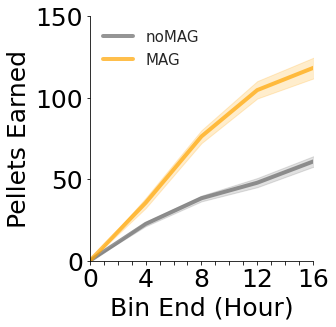

In [4]:
#Fig6B
import matplotlib.ticker as ticker

sns.color_palette(palette='pastel')
sns_plot, ax = plt.subplots(figsize = (4,4.5))
sns.set_style("white")

sns_plot = sns.lineplot(data = df_binned[df_binned.group=='G'], 
                   y = "Left_Poke_Count", 
                   x = "NewRT", #hue = "group", 
                  color='dimgrey',  label = 'noMAG',
                    lw=4, ci=67, alpha=.7)



sns_plot = sns.lineplot(data = df_binned[df_binned.group=='H'], 
                   y = "Left_Poke_Count", 
                   x = "NewRT", color='orange', label = 'MAG',
                   lw=4, ci=67, alpha=.7)

plt.ylabel("Pellets Earned", fontsize=25)
plt.xlabel("Bin End (Hour)", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.xaxis.set_major_locator(ticker.MultipleLocator(1))


x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
labels = ['0','','','','4','','','','8','','','','12','','','','16']
plt.xticks(x, labels, rotation='horizontal')

ax.legend(loc='upper left',prop={'size': 15}, frameon=False)
plt.xlim(0,16)
plt.ylim(0,150)


###uncomment below to download figure

# from google.colab import files
# plt.savefig("act_pokes_vic.pdf", bbox_inches = 'tight')
# files.download("act_pokes_vic.pdf")


([<matplotlib.axis.XTick at 0x7fdedeb63410>,
 [Text(0, 0, 'noMAG'), Text(0, 0, 'MAG')])

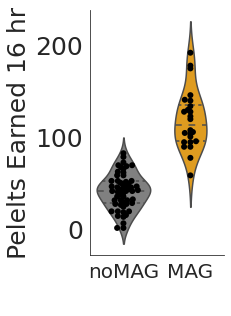

In [5]:
#Fig6C

#make a simpler df
df_binned2 = df_binned.filter(items=['NewRT', 'group', 'Left_Poke_Count','filename'])
df_binned2=df_binned2.dropna().reset_index()
df_binned3 = df_binned2.pivot(index=['filename','group'], columns='NewRT', values='Left_Poke_Count').reset_index()
df_binned3 = df_binned3.ffill(axis=1)
#now, melt back to long form
df_binned4 = df_binned3.melt(id_vars=['filename', 'group'], var_name='NewRT', value_name='Left_Poke_Count')
df_binned4['Left_Poke_Count'] = df_binned4['Left_Poke_Count'].astype(float)

import matplotlib.ticker as ticker

sns.color_palette(palette='pastel')
sns_plot, ax = plt.subplots(figsize = (2.4,4.5))
sns.set_style("white")
pal = {'G':'grey', 'H':'orange'}

df_binned_vic = df_binned4.copy()
df_binned_vic = df_binned_vic[df_binned_vic.group!='A']
df_binned_vic = df_binned_vic[df_binned_vic.group!='B']
df_binned_vic = df_binned_vic[df_binned_vic.group!='C']
df_binned_vic = df_binned_vic[df_binned_vic.group!='D']
df_binned_vic = df_binned_vic[df_binned_vic.group!='E']
df_binned_vic = df_binned_vic[df_binned_vic.group!='F']

x = df_binned_vic[df_binned_vic.NewRT==16]['group']
y = df_binned_vic[df_binned_vic.NewRT==16]['Left_Poke_Count']


sns.swarmplot(x,y, order=["G","H"], size =6, color="Black")


sns.violinplot(x, y, order=["G","H"], alpha=0.5, inner="quartile", palette=pal)

plt.ylabel("Pelelts Earned 16 hr", fontsize=25)
plt.xlabel(" ", fontsize = 25)
plt.tick_params(axis='y', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


x = [0,1]
labels = ['noMAG','MAG']
plt.xticks(x, labels, rotation='horizontal', fontsize=20)


###uncomment below to download figure

# from google.colab import files
# plt.savefig("poke_bars_vic.pdf", bbox_inches = 'tight')
# files.download("poke_bars_vic.pdf")